In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import sklearn as sk
import seaborn as sns

In [2]:
train  = pd.read_csv('file.csv')
test  = pd.read_csv('test1.csv')
train

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
0,4,1316,1316,2,397,6,65.0,169990
1,4,2028,2028,2,880,7,88.0,369900
2,3,1072,1072,2,525,5,35.0,140000
3,3,1048,1048,2,286,6,72.0,135000
4,3,1779,1779,2,546,6,80.0,197900
...,...,...,...,...,...,...,...,...
1087,3,1277,1277,2,526,5,85.0,167000
1088,3,1152,1152,3,300,6,80.0,158500
1089,3,1269,1269,2,308,6,70.0,155000
1090,3,605,605,3,0,5,58.0,86000


In [3]:
train.describe()

,ExterQual,AllFlrsSF,GrLivArea,SimplOverallCond,GarageArea,TotRmsAbvGrd,LotFrontage,SalePrice
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,3.357143,1438.520147,1442.836996,2.178571,449.247253,6.356227,55.337912,171073.323260
std,0.542184,424.774344,425.797442,0.441000,194.350226,1.462776,31.413307,65982.241576
min,2.000000,334.000000,334.000000,1.000000,0.000000,2.000000,0.000000,34900.000000
25%,3.000000,1107.500000,1112.750000,2.000000,308.750000,5.000000,40.000000,128150.000000
50%,3.000000,1416.000000,1419.000000,2.000000,462.000000,6.000000,60.000000,158000.000000
75%,4.000000,1720.000000,1720.000000,2.000000,564.250000,7.000000,76.000000,200000.000000
max,5.000000,2599.000000,2599.000000,3.000000,895.000000,11.000000,124.000000,611657.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ExterQual         1092 non-null   int64  
 1   AllFlrsSF         1092 non-null   int64  
 2   GrLivArea         1092 non-null   int64  
 3   SimplOverallCond  1092 non-null   int64  
 4   GarageArea        1092 non-null   int64  
 5   TotRmsAbvGrd      1092 non-null   int64  
 6   LotFrontage       1092 non-null   float64
 7   SalePrice         1092 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 68.4 KB


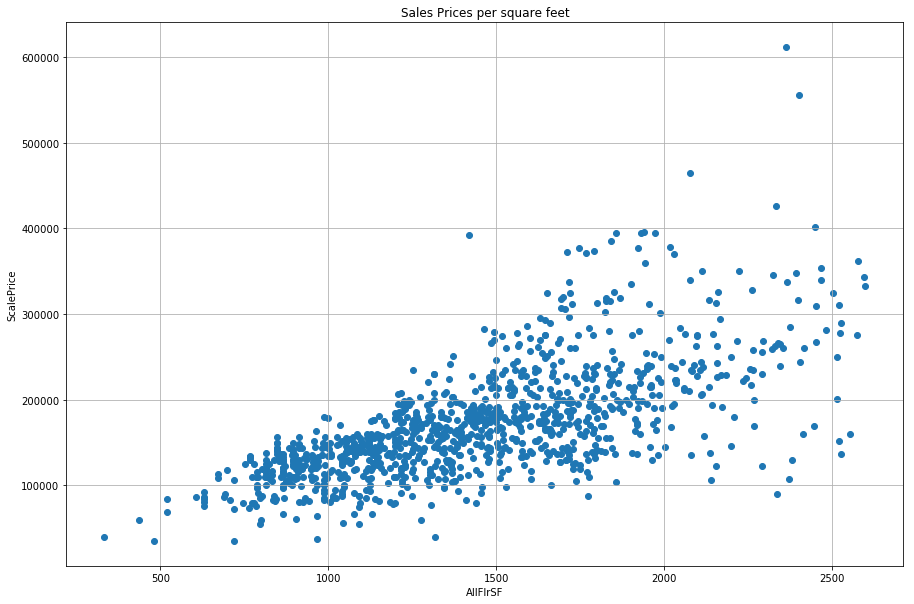

In [5]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
x = train['AllFlrsSF']

y = train['SalePrice']

plt.scatter(x,y)
plt.grid()
plt.title('Sales Prices per square feet')
plt.xlabel('AllFlrSF')
plt.ylabel('ScalePrice')

plt.show()

**In the scatter plot for SalePrice vs GrLivArea, you can clearly see that a linear pattern is evident here i.e. as the value of GrLivArea increases the SalePrice also increases and vice-versa.**

**Assumption1**
According to this assumption, the relationship between response (Dependent Variables) and feature variables (Independent Variables) should be linear.

Linear regression only captures the linear relationship, as it is trying to fit a linear model to the data.

C:\Users\admin\anaconda3333\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


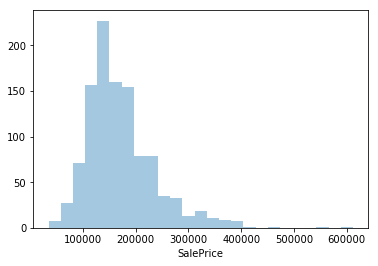

In [6]:
sns.distplot(train['SalePrice'],kde =False,bins=25)



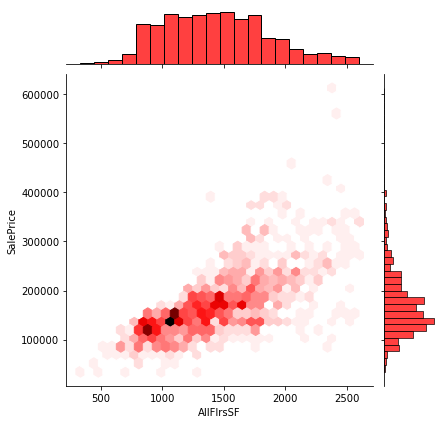

In [7]:
sns.jointplot(x = 'AllFlrsSF',y='SalePrice',data=train,kind='hex',color='red',)

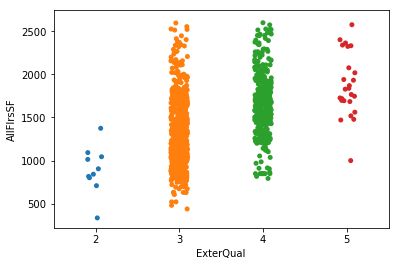

In [8]:
sns.stripplot(x='ExterQual',y='AllFlrsSF',data=train,jitter=True,dodge='True')

In [9]:
train[['ExterQual','AllFlrsSF']]

,ExterQual,AllFlrsSF
0,4,1316
1,4,2028
2,3,1072
3,3,1048
4,3,1779
...,...,...
1087,3,1277
1088,3,1152
1089,3,1269
1090,3,605


In [10]:
train[train['ExterQual'] == 3].count()[0]

707

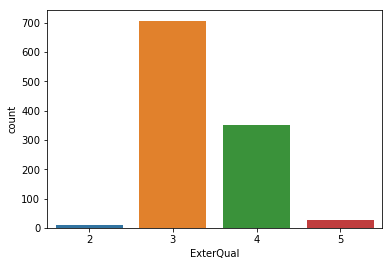

In [11]:
sns.countplot(x='ExterQual',data=train)

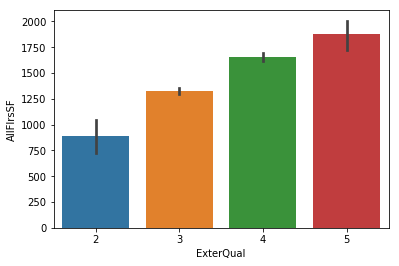

In [12]:
sns.barplot(x='ExterQual',y='AllFlrsSF',data=train)

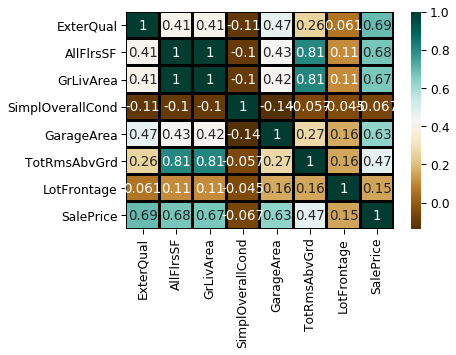

In [13]:
sns.set_context('paper',font_scale=1.4)

crash_mx = train.corr()

sns.heatmap(crash_mx,annot=True,cmap='BrBG',linewidths=2,linecolor='Black')

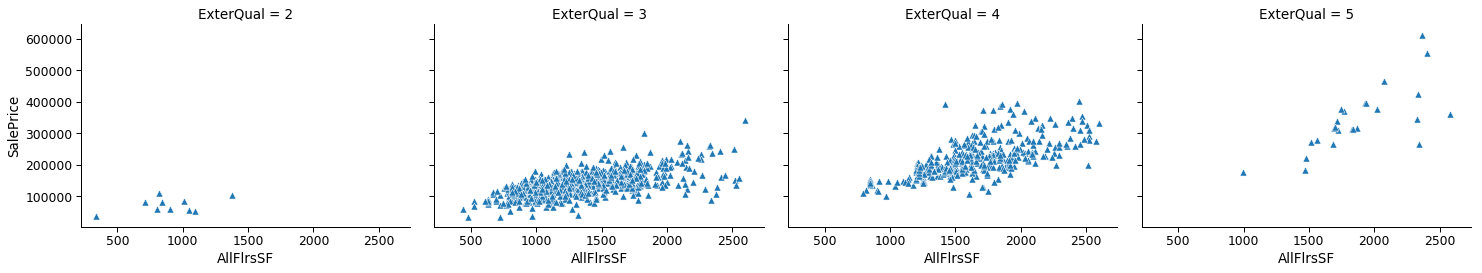

In [14]:
from matplotlib import pyplot as plt
kws = dict(s=50, linewidth=.5,edgecolor='w')
tips_fg = sns.FacetGrid(train,col='ExterQual',height=4,aspect=1.3,hue_order=['Yes','No'],hue_kws=dict(marker=['^','v']))

tips_fg.map(plt.scatter,'AllFlrsSF','SalePrice',**kws)

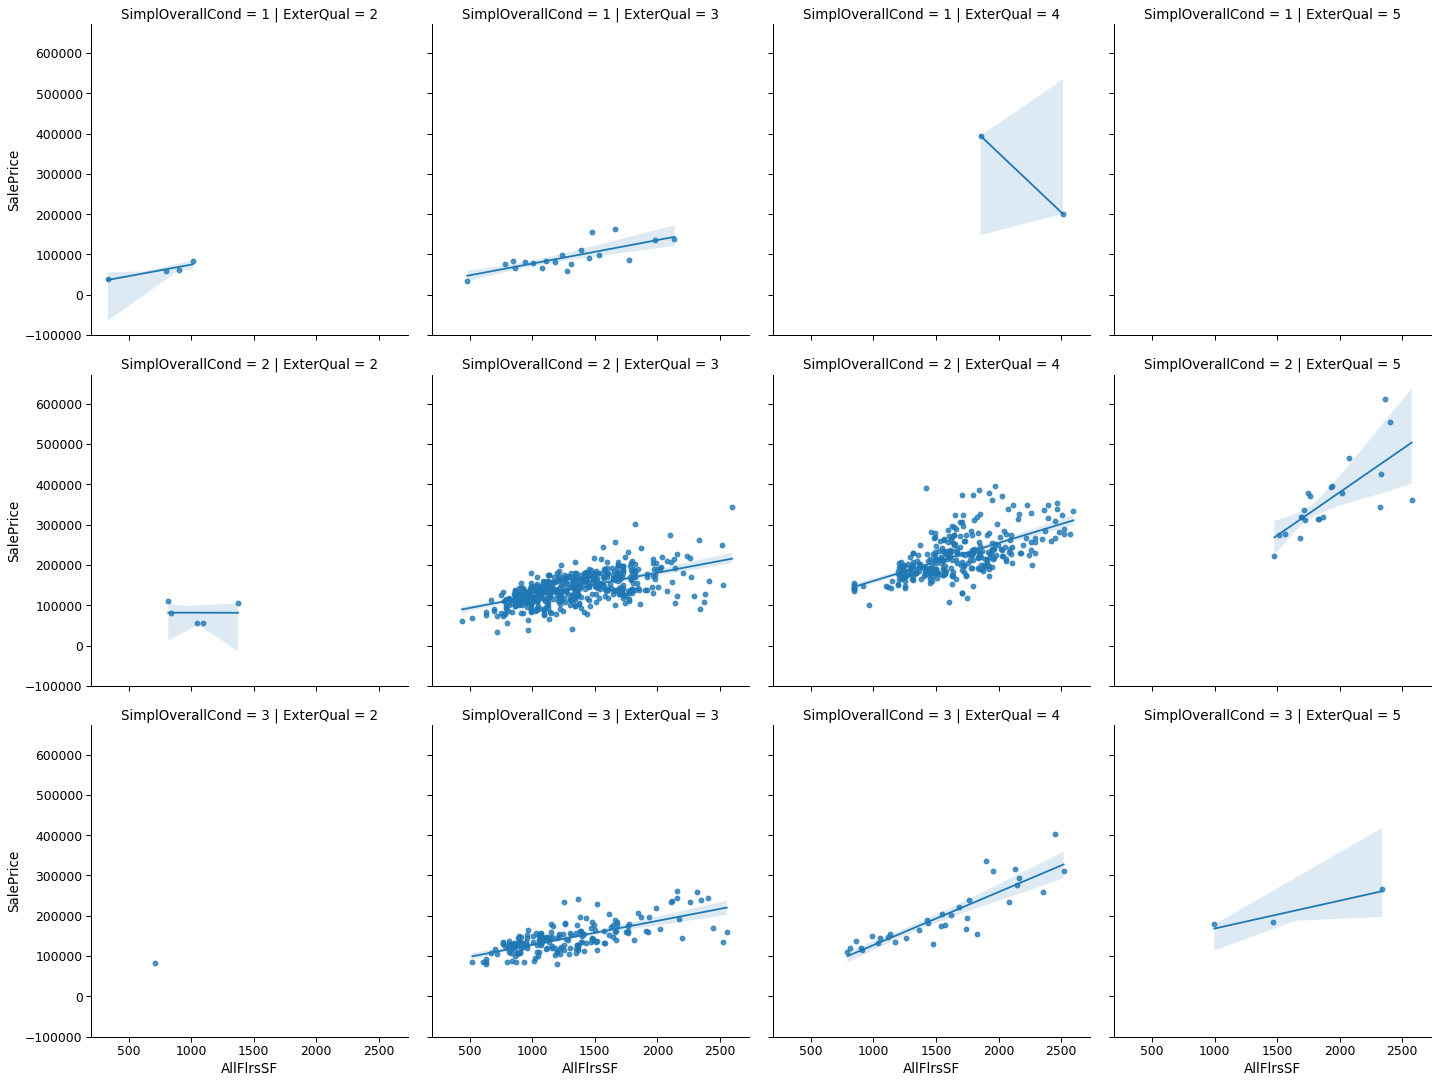

In [15]:
sns.set_context('paper',font_scale=1.4)

sns.lmplot(x='AllFlrsSF',y='SalePrice',col='ExterQual',row='SimplOverallCond',data=train)

<Figure size 576x432 with 0 Axes>

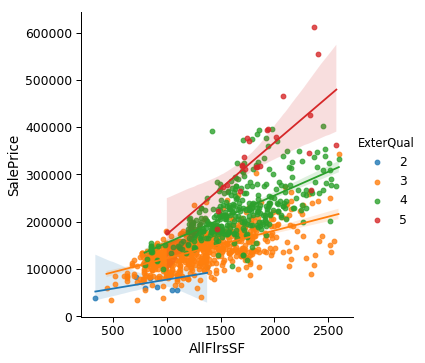

In [16]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='AllFlrsSF',y= 'SalePrice',hue='ExterQual',data=train)

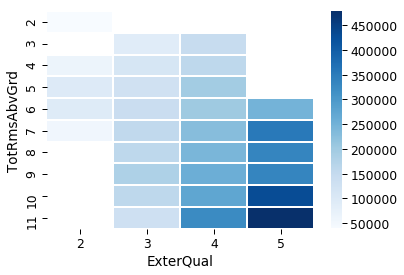

In [17]:
flights = train.pivot_table(index='TotRmsAbvGrd',columns='ExterQual', values='SalePrice')
sns.heatmap(flights,cmap='Blues',linecolor='white',linewidth=1)

C:\Users\admin\anaconda3333\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3333\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


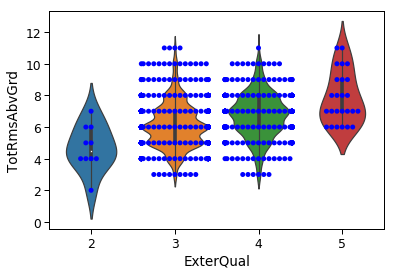

In [18]:
sns.violinplot(x='ExterQual',y='TotRmsAbvGrd',data=train)
sns.swarmplot(x='ExterQual',y='TotRmsAbvGrd',data=train,color='Blue')

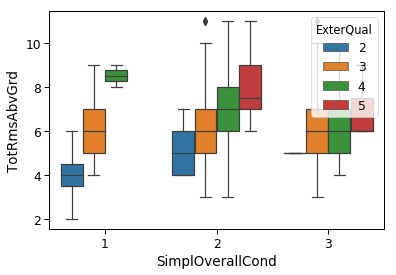

In [19]:
sns.boxplot(x='SimplOverallCond',y='TotRmsAbvGrd',data=train,hue='ExterQual')


<Figure size 576x288 with 0 Axes>

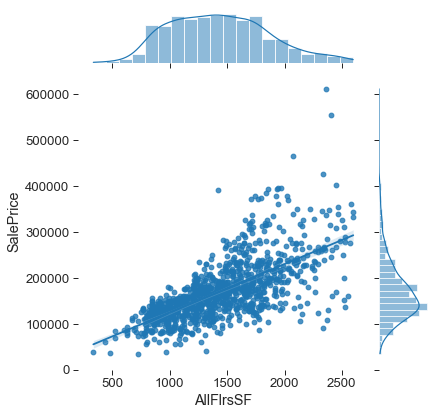

In [20]:
sns.set_style('ticks')

plt.figure(figsize=(8,4))

sns.set_context('paper',font_scale=1.5)

sns.jointplot(x='AllFlrsSF',y='SalePrice',data=train,kind='reg')

sns.despine(left=True,bottom=True)

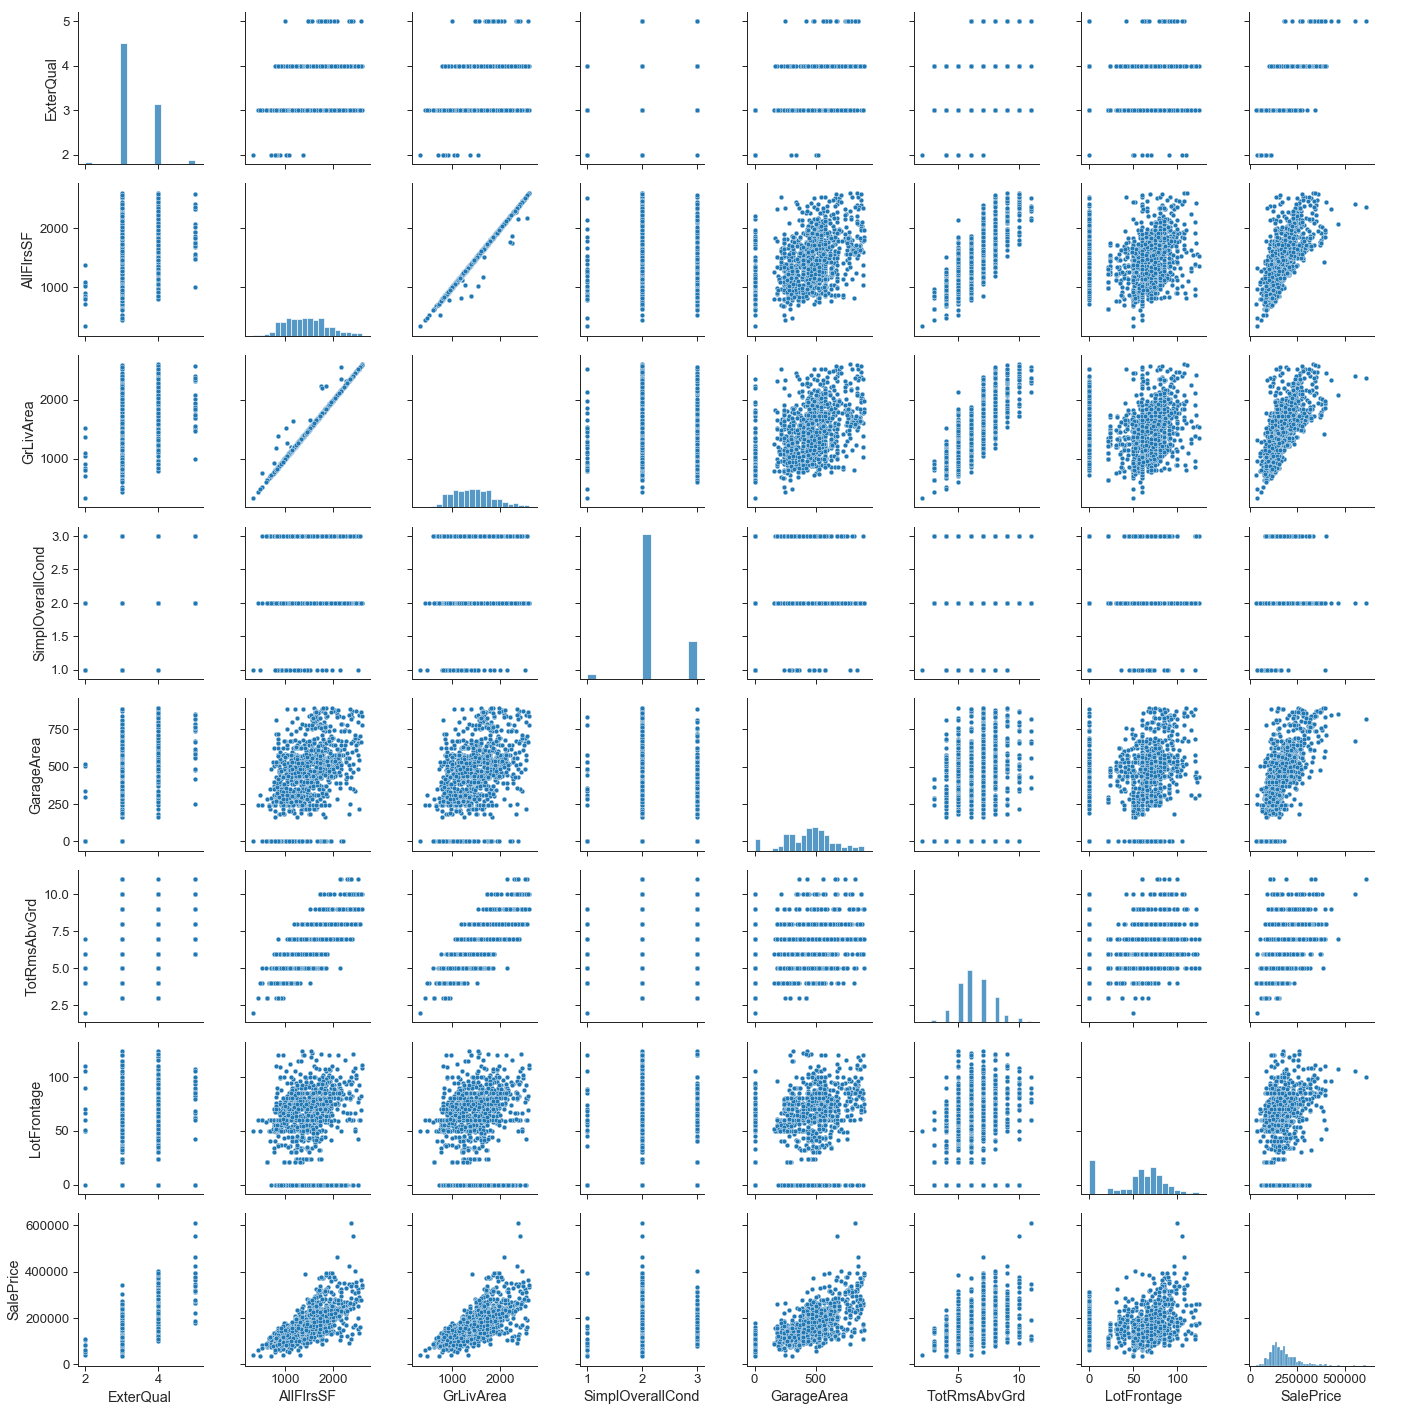

In [21]:
sns.pairplot(train,palette='Blues')

**Little or No Multicollinearity Assumption**
It is assumed that there is little or no multicollinearity in the data. But what do we mean by multicollinearity? Well, multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

**How to validate it?**

Multicollinearity occurs when the features (or independent variables) are not independent of each other. 

1)Pair plots of features help validate.

2)You can also calculate the correlation coefficient (Pearson or Spearman) to figure out which features are correlated.


training and splitting

In [22]:
X_train, y_train = train.iloc[:,:7], train.iloc[:,7]
X_test, y_test = test.iloc[:,:7], test.iloc[:,7]

# display first five rows of training features and target
print(X_train.head(5))
print(y_train.head(5))

   ExterQual  AllFlrsSF  GrLivArea  SimplOverallCond  GarageArea  \
0          4       1316       1316                 2         397   
1          4       2028       2028                 2         880   
2          3       1072       1072                 2         525   
3          3       1048       1048                 2         286   
4          3       1779       1779                 2         546   

   TotRmsAbvGrd  LotFrontage  
0             6         65.0  
1             7         88.0  
2             5         35.0  
3             6         72.0  
4             6         80.0  
0    169990
1    369900
2    140000
3    135000
4    197900
Name: SalePrice, dtype: int64


**Discrete example to understand OLS**


Let's take an example to clarify the understanding of the above calculation. For simplicity, we will consider only one feature i.e. GarageArea as our feature vector X and we have 'SalePrice' as our target vector y

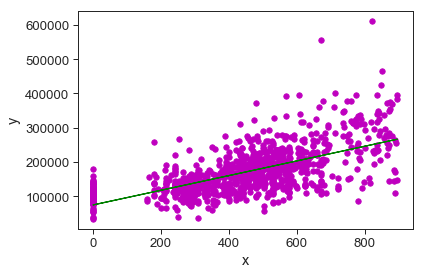

In [23]:
# import packages
import matplotlib.pyplot as plt


# Code starts here
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x)- n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

# Visualize your results
values = estimate_coef(X_train['GarageArea'], y_train)
plot_regression_line(X_train['GarageArea'], y_train, values)
# Code ends here


Now that you have gone through the mathematical concept of Ordinary Least Squares let us see how we can implement the same in Python using sklearn library. The steps involved for building a model will be as follows:

**Train the model using sklearn**
**Test it on the test set using sklearn**

In [24]:
from sklearn.linear_model import LinearRegression 


linreg = LinearRegression()
linreg.fit(X_train, np.log(y_train))
y_pred = linreg.predict(X_test)
print(linreg.score(X_test, y_test))
print(len(y_pred))
#print(y_pred)

-5.036743658700764
292


**We can use .score() method that takes samples x and y as its 2 arguments to find R2 or the coefficient of determination. The best value for R2 is 1.0 and it can take negative values too, as the model can be worse. A closer value of R2 to 1.0 indicates the efficiency of our model.**

Now that you have fitted your model on training data, it is time to test it on unseen data. You also need to have some kind of measure to quantify the performance of the model. This measure is captured by what we call the error metrics and there are many different forms depending on the problem statement.

We have a regression problem at hand and the different types of error metrics that can be used are:

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R-Squared

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.


**Mean Absolute Error**

So we already know what a residual is. To recap, it is the difference between our prediction and the true value. Mean absolute error is nothing but the average of absolute values of these residuals.  It measures the average of the residuals in the dataset.

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, np.exp(y_pred))
print(mae)

29158.295036636522


**The cost function helps to figure out the best possible values for a0 and a1, which provides the best fit line for the data points.**

Cost function optimizes the regression coefficients or weights and measures how a linear regression model is performing. The cost function is used to find the accuracy of the mapping function that maps the input variable to the output variable. This mapping function is also known as the Hypothesis function.

In Linear Regression, Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the predicted values and actual values.

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, np.exp(y_pred))
print(mse)

1835511414.8306875


**Root Mean Square Error**

Root mean Square Error (RMSE) is nothing but the square root of the mean/average of the squares of all the errors.

RMSE is very commonly used and makes for an excellent general purpose error metric for numerical predictions.

Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors.

In [34]:
rmse = np.sqrt(mse)

In [33]:
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, np.exp(y_pred)))
print(rmse1)

42842.86889122491


In [35]:
print(rmse)

42842.86889122491


A good model should have an RMSE value less than 180. In case you have a higher RMSE value, this would mean that you probably need to change your feature or probably you need to tweak your hyperparameters. 

**Why are we squaring the Residuals and then taking a root?**

Residuals can be positive or negative as the predicted value underestimates or overestimates the actual value

Thus to just focus on the magnitude of the error we take the square of the difference as it's always positive

So you may wonder what is the advantage of RMSE when we could just take the absolute difference instead of squaring

RMSE severely punishes large differences in prediction. This is the reason why RMSE is powerful as compared to Absolute Error.

Evaluating the RMSE and tuning our model to minimize its results in a more robust model.

**R-Squared**


R-squared is a statistical measure of how close the data are to the fitted regression line i.e. **it measures the goodness of fit of a straight line**. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

**It is a measure of the proportion of variability in the response that is explained by the regression model.**

0 % indicates that the model explains none of the variability of the response data around its mean.

100% indicates that the model explains all the variability of the response data around its mean.

<img src="r.png" alt="Italian Trulli">

**Adjusted R-squared**

To counter the issue of adding more independent variables, you should consider using the metric Adjusted R-squared instead of R-squared. Simply put it penalizes the model for adding irrelevant explanatory variables. Mathematically,

<img src="ar.jpeg" alt="Italian Trulli">

where

n = Number of data points

p = Number of explanatory/independent variables

So how is R-squared different from Adjusted R-squared? R-squared tells you how well your model fits the data points whereas Adjusted R-squared tells you how important is a particular feature to your model.

In [30]:
from sklearn.metrics import r2_score
rsquared = r2_score(y_test, np.exp(y_pred))
print("The accuracy of the model is")
print(rsquared)

The accuracy of the model is
0.7378446924962252
